In [1]:
from google.colab import files
uploaded = files.upload()

Saving p2h.csv to p2h.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving p2l.csv to p2l.csv


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal


In [4]:
#CSV files of raw ppg data of 22 persons collected during 0-back (low workload) trials
df1 = pd.read_csv(('p2l.csv'))
df1

,Trial 1:0back,Trial 6:0back
0,32.862,34.755
1,32.839,34.676
2,32.838,34.597
3,32.861,34.517
4,32.910,34.436
...,...,...
76795,38.499,33.383
76796,38.439,33.416
76797,38.381,33.467
76798,38.326,33.538


In [5]:
#CSV files of raw ppg data of 22 persons collected during 3-back (high workload) trials

df2=pd.read_csv('p2h.csv')
df2

,Trial 3:3back,Trial 5:3back
0,35.228,35.968
1,35.194,35.932
2,35.158,35.901
3,35.120,35.875
4,35.080,35.853
...,...,...
76795,34.093,35.634
76796,34.097,35.599
76797,34.105,35.562
76798,34.118,35.525


In [7]:
ppg_1=df1['Trial 1:0back']



In [8]:
#set the sampling rate of ppg data 256 Hz as mentioned in MAUS documentation.

sampling_rate=256
time=np.arange(len(ppg_1))/sampling_rate


Text(0.5, 1.0, 'PPG Signal 1')

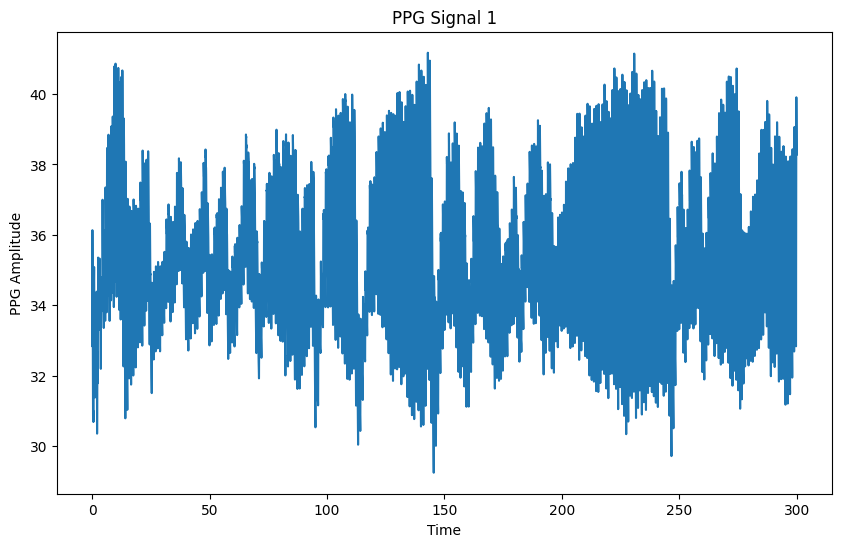

In [29]:
plt.figure(figsize=(10,6))
plt.plot(time,ppg_1)
plt.xlabel('Time')
plt.ylabel('PPG Amplitude')
plt.title('PPG Signal 1')

Text(0.5, 1.0, 'PPG Signal 2')

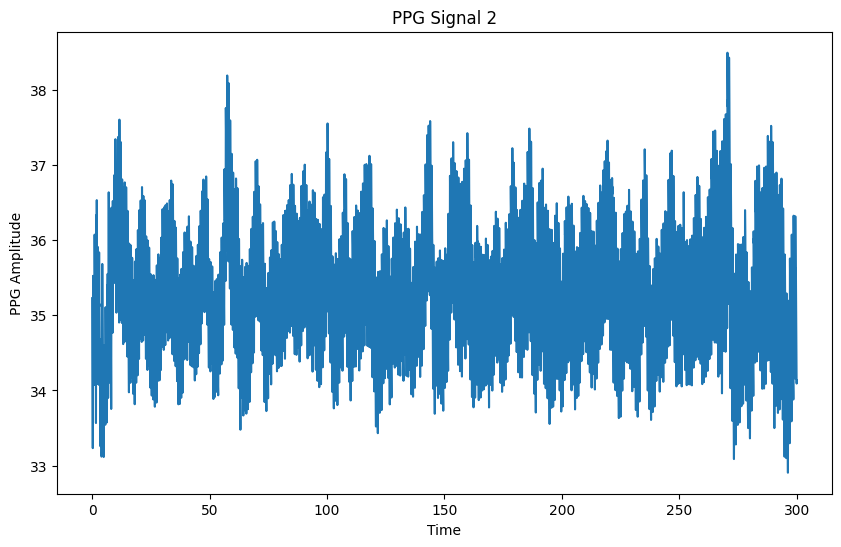

In [28]:
ppg2 = df2['Trial 3:3back']
plt.figure(figsize=(10,6))
plt.plot(time, ppg2[:len(time)])
plt.xlabel('Time')
plt.ylabel('PPG Amplitude')
plt.title ('PPG Signal 2')

In [11]:
# EMD-signal is a Python package that provides tools for Empirical Mode Decomposition (EMD) and related signal processing tasks.
!pip install EMD-signal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.6 MB/s eta 0:00:00


In [12]:
import os
import sys
from scipy.signal import hilbert
from PyEMD import EMD
pd.options.display.precision = 10
from os import listdir

In [15]:
col1 = df1['Trial 1:0back'].iloc[0:768]
S1 = col1.values
t=np.arange(len(col1))/sampling_rate
print ('S shape:', S1.shape)
print('t shape:', t.shape)

S shape: (768,)
t shape: (768,)


### EMD is a method used to analyze nonlinear and non-stationary time series data by decomposing a signal into its intrinsic mode functions (IMFs). These IMFs represent different oscillatory modes embedded within the original signal.

### The purpose of extracting IMFs is to break down complex signals into simpler oscillatory modes that are easier to analyze.

In [30]:
# IMFs
config = {'spline_kind':'cubic', 'MAX_ITERATION':100}
emd = EMD(**config)
imfs = emd(S1, max_imf=7)
print('imfs = ' + f'{imfs.shape[0]:4d}')

imfs =    5


the signal S1 into 5 components

In [32]:
def instant_phase(imfs):
    """Extract analytical signal through Hilbert Transform."""
    analytic_signal = hilbert(imfs)  # Apply Hilbert transform to each row
    # Compute angle between img and real
    phase = np.unwrap(np.angle(analytic_signal))
    return phase
# Extract instantaneous phases and frequencies using Hilbert transform
instant_phases = instant_phase(imfs)
instant_freqs = np.diff(instant_phases)/(2*np.pi*dt)

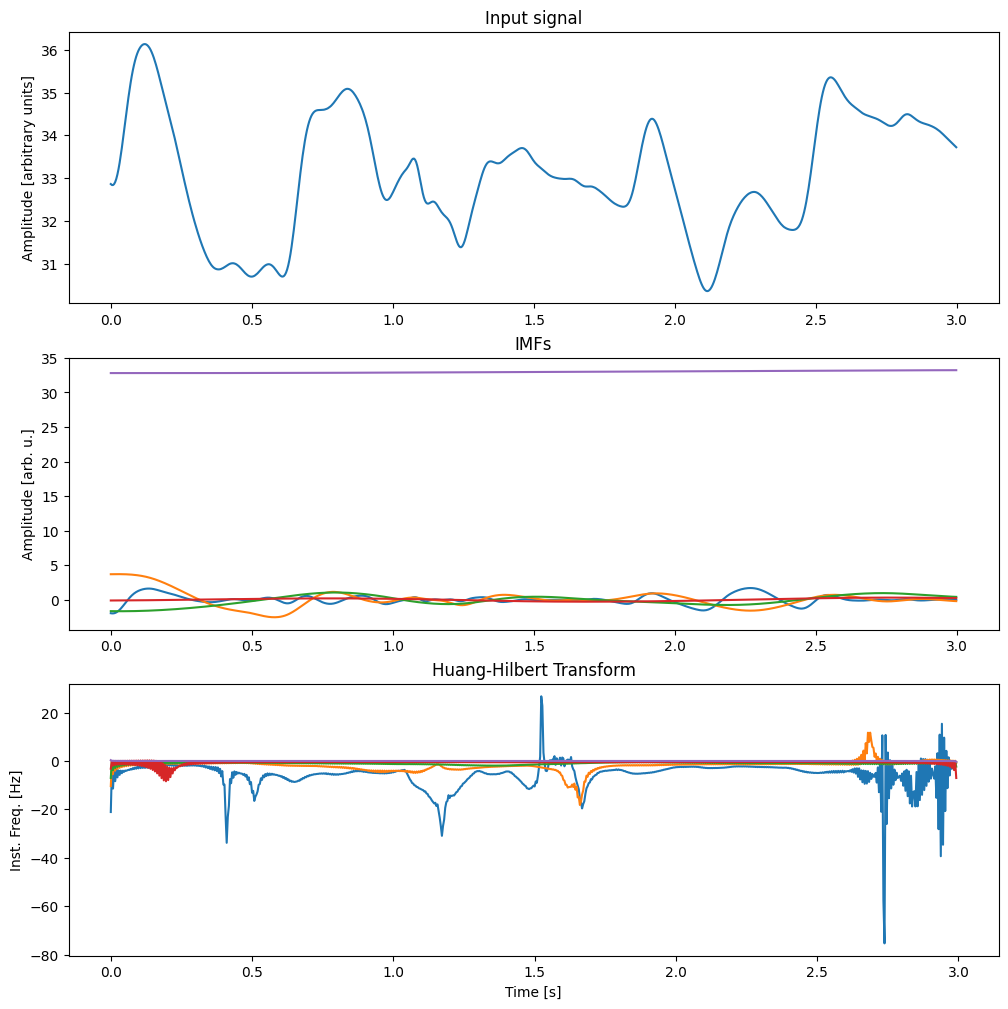

In [33]:
# Create a figure consisting of 3 panels
fig, axes = plt.subplots(3, figsize=(12, 12))

# The top panel shows the input signal
ax = axes[0]
ax.plot(t, S1)
ax.set_ylabel("Amplitude [arbitrary units]")
ax.set_title("Input signal")

# The middle panel shows all IMFs
ax = axes[1]
for num, imf in enumerate(imfs):
    ax.plot(t, imf, label='IMF %s' %( num + 1 ))

ax.set_ylabel("Amplitude [arb. u.]")
ax.set_title("IMFs")

# The bottom panel shows all instantaneous frequencies
ax = axes[2]
for num, instant_freq in enumerate(instant_freqs):
    ax.plot(t[:-1], instant_freq, label='IMF %s'%(num+1))

ax.set_xlabel("Time [s]")
ax.set_ylabel("Inst. Freq. [Hz]")
ax.set_title("Huang-Hilbert Transform")

plt.show()

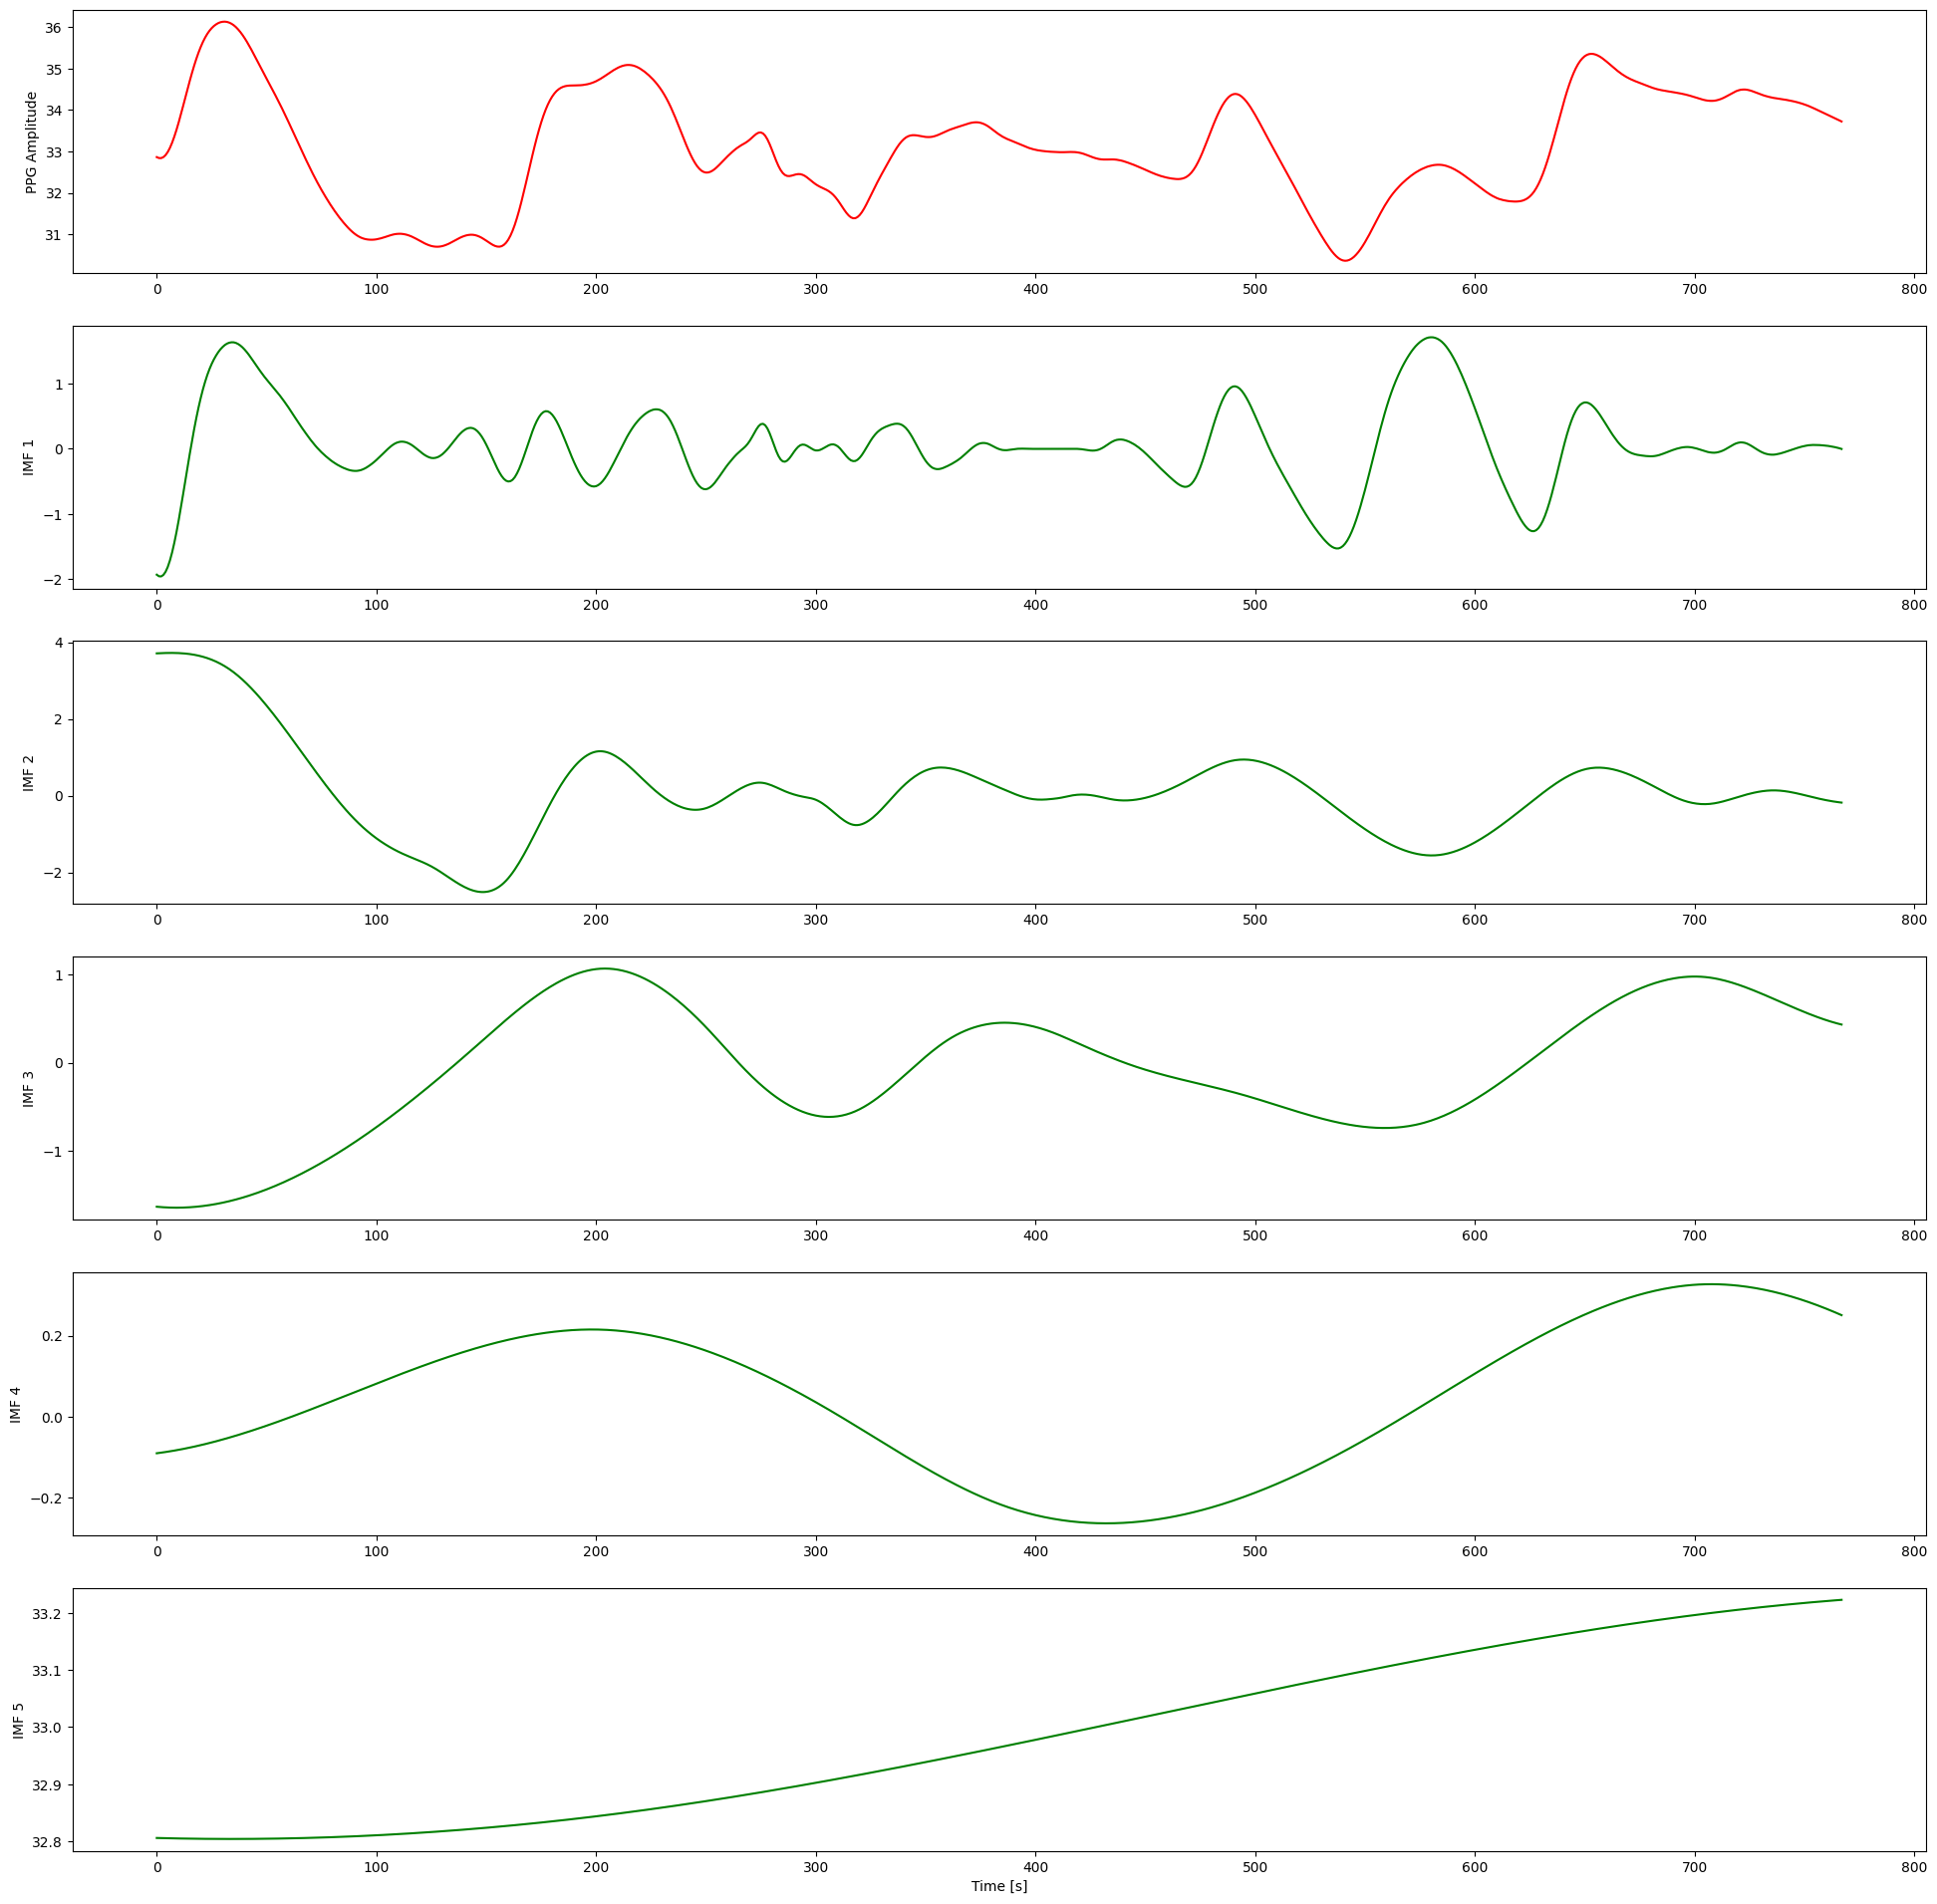

In [34]:
# Plot imfs along with input signal
nIMFs = imfs.shape[0]
plt.figure(figsize=(24,24))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(S1, 'r')
plt.ylabel('PPG Amplitude')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(imfs[n], 'g')
    plt.ylabel("IMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.show()

EMD on HIGH sample

In [22]:
print(df2.head(10))

# Selecting column 1 of dataframe along with 768 rows
col1=df2['Trial 3:3back'].iloc[0:768]
S2 = col1.values
t=np.arange(len(col1))/sampling_rate

print('S shape: ', S2.shape)
print('t shape: ', t.shape)

   Trial 3:3back  Trial 5:3back
0         35.228         35.968
1         35.194         35.932
2         35.158         35.901
3         35.120         35.875
4         35.080         35.853
5         35.038         35.837
6         34.995         35.826
7         34.952         35.819
8         34.909         35.816
9         34.866         35.818
S shape:  (768,)
t shape:  (768,)


In [35]:
# Compute IMFs with EMD
config = {'spline_kind':'cubic', 'MAX_ITERATION':100}
emd = EMD(**config)
imfs = emd(S2, max_imf=7)
print('imfs = ' + f'{imfs.shape[0]:4d}')

imfs =    4


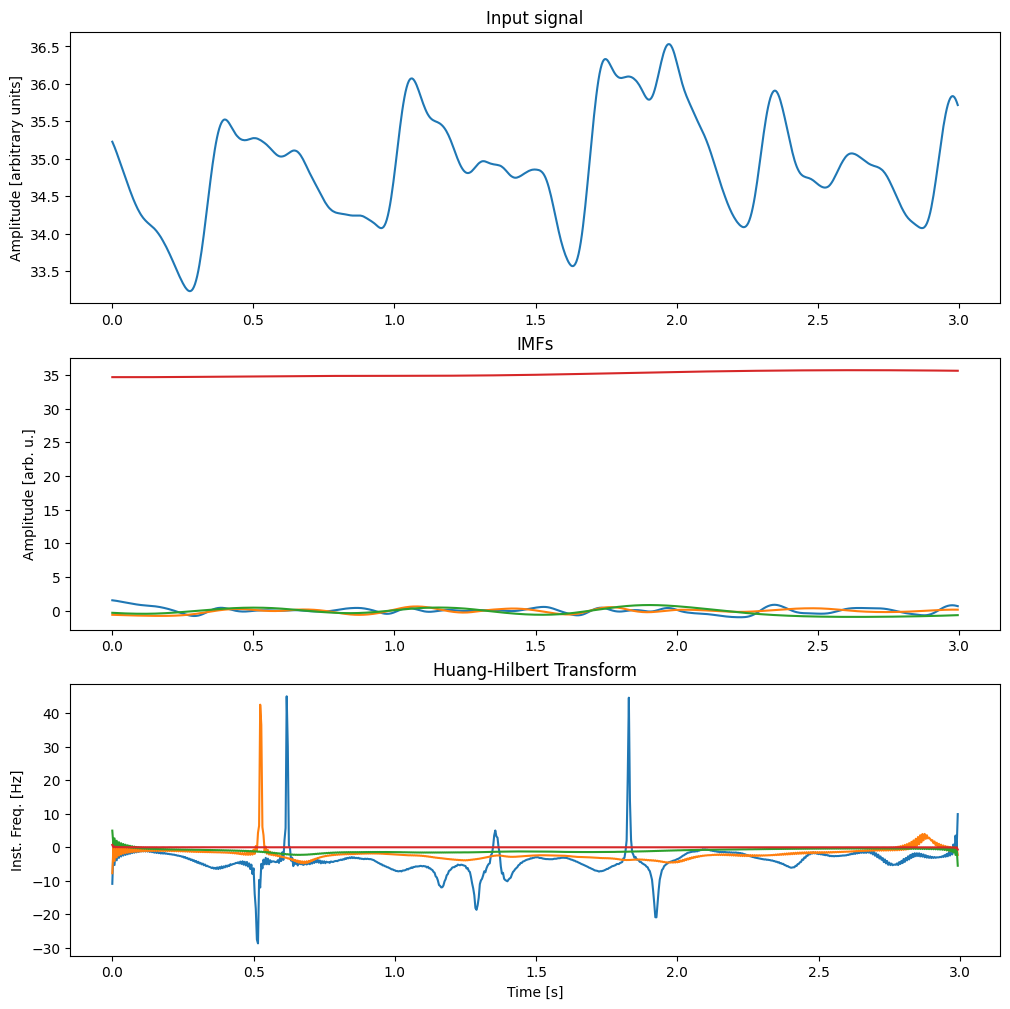

In [37]:

def instant_phase(imfs):
    """Extract analytical signal through Hilbert Transform."""
    analytic_signal = hilbert(imfs)  # Apply Hilbert transform to each row
    # Compute angle between img and real
    phase = np.unwrap(np.angle(analytic_signal))
    return phase

# Extract instantaneous phases and frequencies using Hilbert transform
instant_phases = instant_phase(imfs)
instant_freqs = np.diff(instant_phases)/(2*np.pi*dt)

# Create a figure consisting of 3 panels
fig, axes = plt.subplots(3, figsize=(12, 12))

# The input signal
ax = axes[0]
ax.plot(t, S2)
ax.set_ylabel("Amplitude [arbitrary units]")
ax.set_title("Input signal")

# all IMFs
ax = axes[1]
for num, imf in enumerate(imfs):
    ax.plot(t, imf, label='IMF %s' %( num + 1 ))
ax.set_ylabel("Amplitude [arb. u.]")
ax.set_title("IMFs")

# The instantaneous frequencies
ax = axes[2]
for num, instant_freq in enumerate(instant_freqs):
    ax.plot(t[:-1], instant_freq, label='IMF %s'%(num+1))

ax.set_xlabel("Time [s]")
ax.set_ylabel("Inst. Freq. [Hz]")
ax.set_title("Huang-Hilbert Transform")
plt.show()


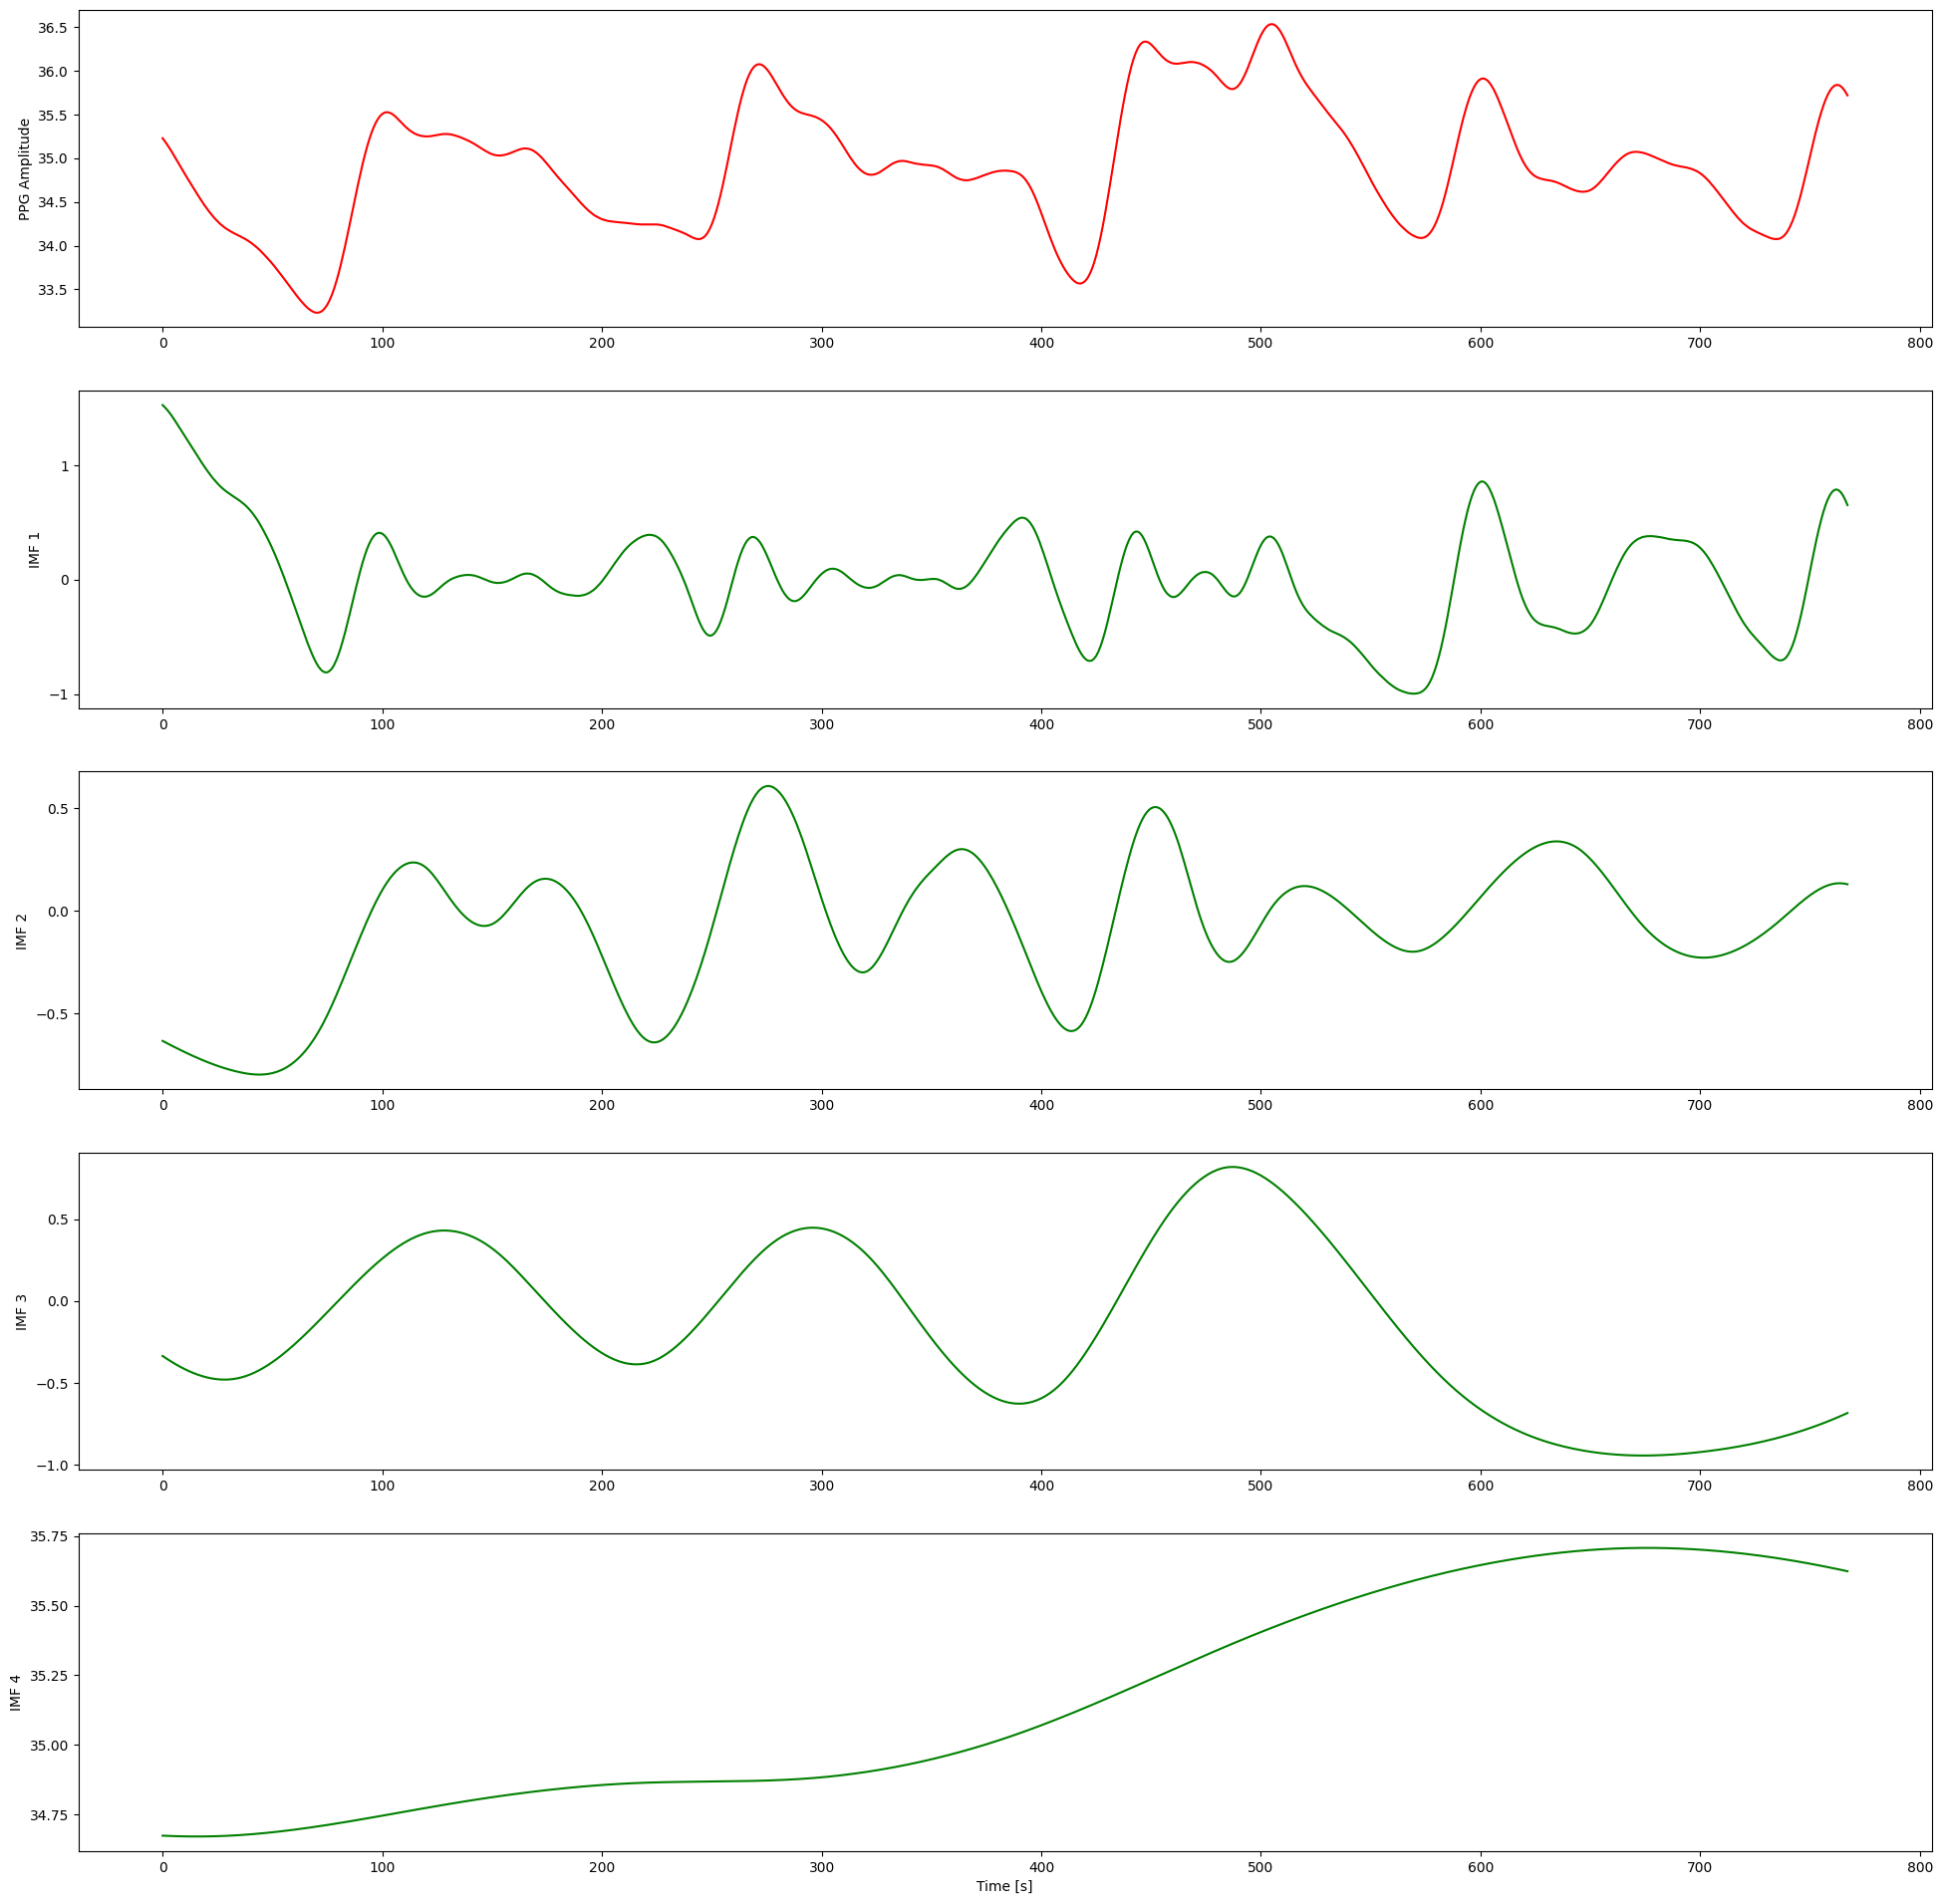

In [38]:
 ##Plot imfs
nIMFs = imfs.shape[0]
plt.figure(figsize=(24,24))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(S2, 'r')
plt.ylabel('PPG Amplitude')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(imfs[n], 'g')
    plt.ylabel("IMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.show()